## Pip install

In [ ]:
!pip install xgboost --quiet
!pip install -q sentence-transformers

# Carga de los datos y creación del dataset conjunto

## Imports

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import random
import ast
import seaborn as sns
import collections.abc
from datetime import datetime, timedelta

## Funciones

In [ ]:
def extract_director(crew_data):
    try:
        crew = ast.literal_eval(crew_data)
        for person in crew:
            if person['job'] == 'Director':
                return person['name']
        return None
    except:
        return None

def extract_keywords(text):
    try:
        keywords = ast.literal_eval(text)
        return [kw['name'] for kw in keywords]
    except:
        return []

# Paso 2: Convertir a diccionario solo si es string
def safe_literal_eval(val):
    if isinstance(val, dict):
        return val
    try:
        return ast.literal_eval(val)
    except:
        return {'id': None, 'name': 'No Collection', 'poster_path': None, 'backdrop_path': None}

# 2. production_companies: rellenamos listas vacías o NaNs con estructura estándar

def fix_production_companies(val):
    try:
        # Si es NaN
        if pd.isna(val):
            return [{'name': 'No Company', 'id': None}]

        # Si es string tipo lista, lo evaluamos
        if isinstance(val, str):
            val = ast.literal_eval(val)
        # Si es iterable (lista, array, etc.)
        if isinstance(val, collections.abc.Iterable):
            if len(val) == 0:
                return [{'name': 'No Company', 'id': None}]
            return val

    except Exception as e:
        print(f"Error procesando {val}: {e}")
        return [{'name': 'No Company', 'id': None}]
def fix_production_companies(val):
    try:
        # Si es NaN
        if pd.isna(val):
            return [{'name': 'No Company', 'id': None}]

        # Si es string tipo lista, lo evaluamos
        if isinstance(val, str):
            val = ast.literal_eval(val)

        # Si es iterable (lista, array, etc.)
        if isinstance(val, collections.abc.Iterable):
            if len(val) == 0:
                return [{'name': 'No Company', 'id': None}]
            return val

    except Exception as e:
        print(f"Error procesando {val}: {e}")
        return [{'name': 'No Company', 'id': None}]


def fix_production_companies(val):
    try:
        # Si es NaN
        if pd.isna(val):
            return [{'name': 'No Company', 'id': None}]

        # Si es string tipo lista, lo evaluamos
        if isinstance(val, str):
            val = ast.literal_eval(val)

        # Si es iterable (lista, array, etc.)
        if isinstance(val, collections.abc.Iterable):
            if len(val) == 0:
                return [{'name': 'No Company', 'id': None}]
            return val

    except Exception as e:
        print(f"Error procesando {val}: {e}")
        return [{'name': 'No Company', 'id': None}]



# 4. Generos
def fix_genres(val):
    try:
        genres = ast.literal_eval(val) if isinstance(val, str) else val
        if isinstance(genres, list) and len(genres) > 0:
            return genres
        else:
            return [{'id': None, 'name': 'No Genre'}]
    except:
        return [{'id': None, 'name': 'No Genre'}]

def random_date(start, end):
    """Genera una fecha aleatoria entre start y end"""
    delta = end - start
    random_days = random.randint(0, delta.days)
    return start + timedelta(days=random_days)

def random_unknown_director():
    return 'unknown_' + str(random.randint(10000, 99999))

In [ ]:
# Configuraciones generales
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")


# Luego borro esto que es para cargar los datos



from google.colab import drive
drive.mount('/content/drive')

# Ruta base
path = '/content/drive/MyDrive/Master/Cuatri II/SIGE/SIGE-Teoría/data/'

# Archivos principales
movies = pd.read_csv(path + 'movies_metadata.csv', low_memory=False)
credits = pd.read_csv(path + 'credits.csv')
keywords = pd.read_csv(path + 'keywords.csv')
ratings_small = pd.read_csv(path + 'ratings_small.csv')
ratings = pd.read_csv(path + 'ratings.csv')
peliculas_nuevas = pd.read_csv(path + 'peliculas_nuevas.csv')

datasets = {
    "movies_metadata": movies,
    "credits": credits,
    "keywords": keywords,
    "ratings_small": ratings_small,
    "ratings": ratings,
    "peliculas_nuevas": peliculas_nuevas
}





# path = 'Datos/'

# Archivos principales
# movies = pd.read_csv(path + 'movies_metadata.csv', low_memory=False)
# credits = pd.read_csv(path + 'credits.csv')
# keywords = pd.read_csv(path + 'keywords.csv')
# ratings_small = pd.read_csv(path + 'ratings_small.csv')

# datasets = {
#     "movies_metadata": movies,
  #   "credits": credits,
    # "keywords": keywords,
# }

# Aplicar transformación
keywords['keywords'] = keywords['keywords'].apply(extract_keywords)

# Renombramos 'id' para evitar conflictos al hacer merge
keywords.rename(columns={'id': 'id_keywords'}, inplace=True)

# Convertimos a string el id de películas en 'movies' para emparejarlo correctamente
movies['id'] = movies['id'].astype(str)
keywords['id_keywords'] = keywords['id_keywords'].astype(str)

# Merge
movies = movies.merge(keywords, how='left', left_on='id', right_on='id_keywords')
movies.drop(columns=['id_keywords'], inplace=True)

# Aplicamos la función
credits['director'] = credits['crew'].apply(extract_director)

# Renombramos id para evitar conflicto
credits.rename(columns={'id': 'id_credits'}, inplace=True)

# Emparejamos tipos
credits['id_credits'] = credits['id_credits'].astype(str)

# Merge
movies = movies.merge(credits[['id_credits', 'director']], how='left', left_on='id', right_on='id_credits')
movies.drop(columns=['id_credits'], inplace=True)

columns_to_drop = [
    'homepage', 'original_language', 'original_title', 'spoken_languages',
    'poster_path', 'production_countries', 'status', 'video', 'tagline'
]

movies.drop(columns=columns_to_drop, inplace=True)
movies.head(5)
movies.isnull().sum()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0
adult,0
belongs_to_collection,42055
budget,0
genres,0
id,0
imdb_id,17
overview,995
popularity,6
production_companies,4
release_date,88


## Limpieza de valores nulos y anómalos

In [ ]:
movies = movies[movies['adult'].isin(['True','False'])]
movies = movies.dropna(subset=['title'])
# Paso 1: Imputar si es NaN
movies['belongs_to_collection'] = movies['belongs_to_collection'].fillna(
    '{"id": none, "name": "No Collection", "poster_path": null, "backdrop_path": null}'
)
movies['belongs_to_collection'] = movies['belongs_to_collection'].apply(safe_literal_eval)
movies['production_companies'] = movies['production_companies'].apply(fix_production_companies)
movies['genres'] = movies['genres'].apply(fix_genres)
movies['director'] = movies['director'].apply(lambda x: x if pd.notnull(x) else random_unknown_director())
movies['overview'] = movies['overview'].fillna('Unknown')
movies['runtime'] = movies['runtime'].fillna(movies['runtime'].mean())
movies['popularity'] = movies['popularity'].fillna(0)
movies['vote_count'] = movies['vote_count'].fillna(0)
movies['vote_average'] = movies['vote_average'].fillna(0)
movies['revenue'] = movies['revenue'].fillna(0)
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
# Paso 3: rango de fechas
start_date = datetime(1900, 1, 1)
end_date = datetime(2015, 12, 31)
# Paso 4: imputar fechas nulas
movies['release_date'] = movies['release_date'].apply(
    lambda x: random_date(start_date, end_date) if pd.isnull(x) else x
)
movies['keywords'] = movies['keywords'].apply(lambda x: x if isinstance(x, list) else ['Film'])
movies.isnull().sum()


#movies.to_csv('Datos/movies_combined.csv', index=False)

,0
adult,0
belongs_to_collection,0
budget,0
genres,0
id,0
imdb_id,17
overview,0
popularity,0
production_companies,0
release_date,0


# Visualizacion de los datos

## Imports

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

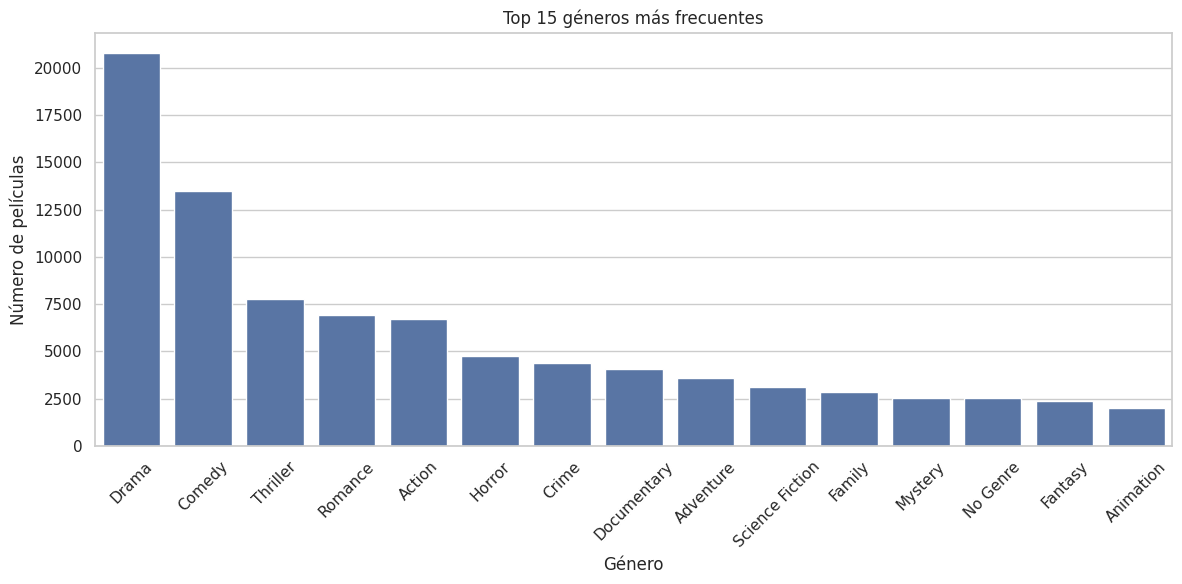

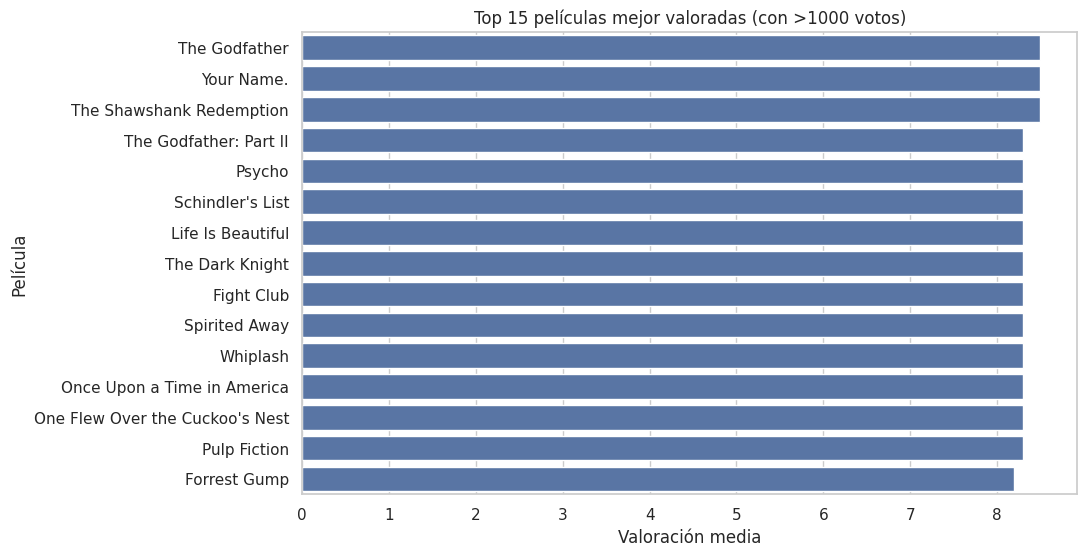

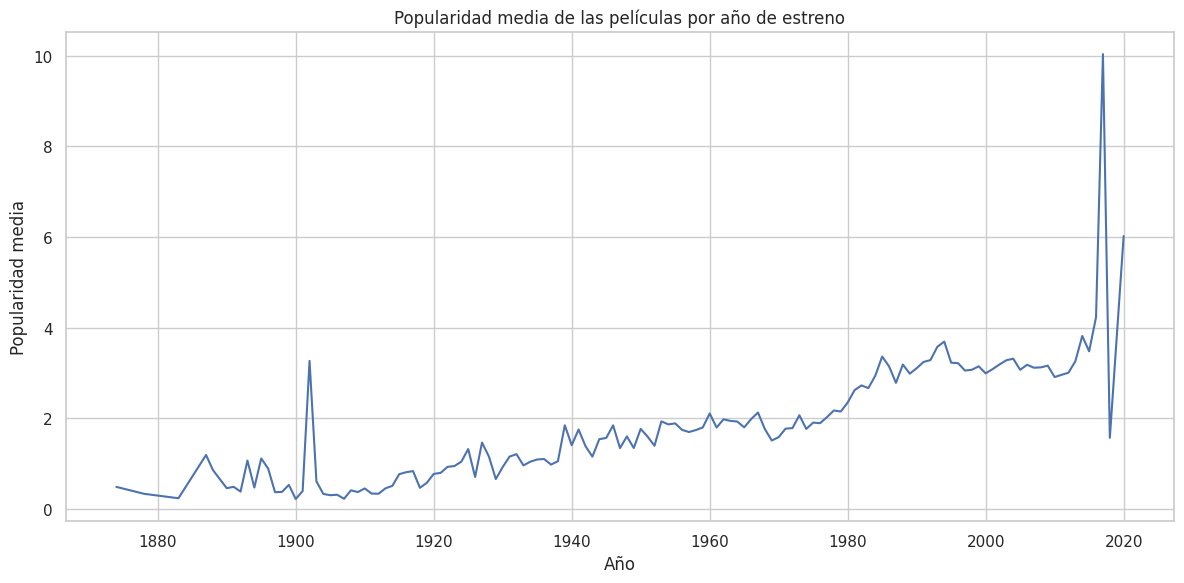

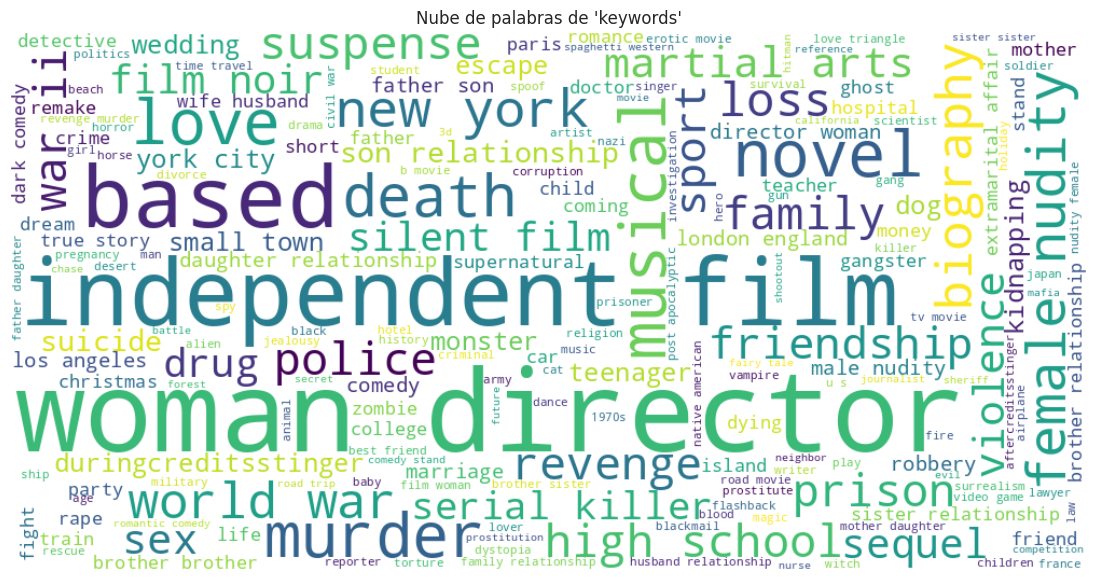

<ipython-input-15-2b41ff3a69cb>:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_movies', y=top_directors.index, data=top_directors, palette='Blues_d')


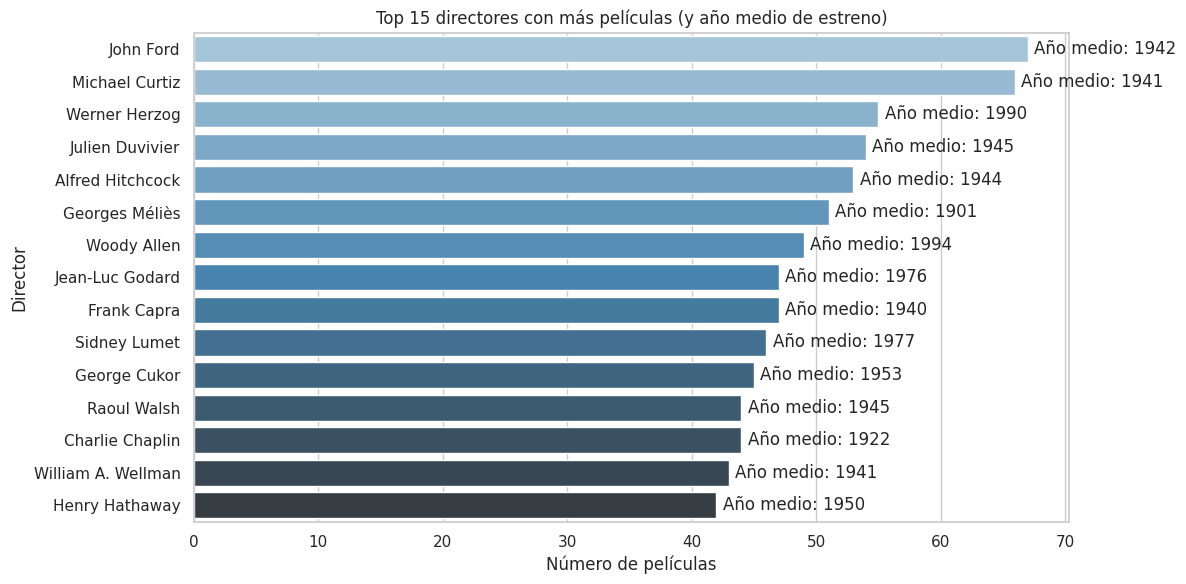

<ipython-input-15-2b41ff3a69cb>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_rating', y=top_rated_directors.index, data=top_rated_directors, palette='Greens_d')


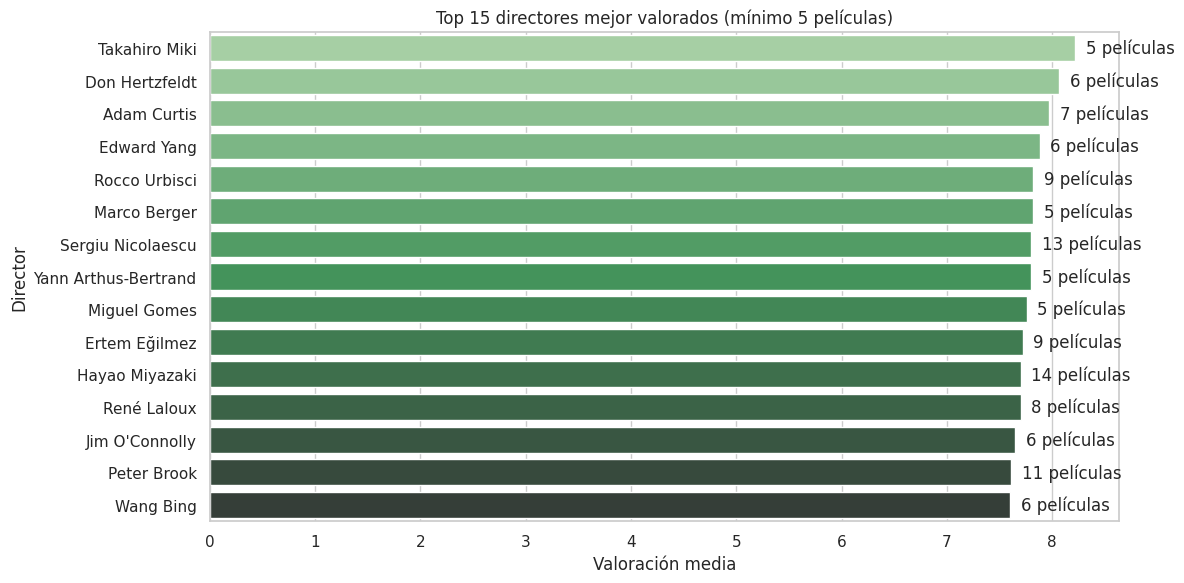

<ipython-input-15-2b41ff3a69cb>:158: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_rating', y=top_rated_directors.index, data=top_rated_directors, palette='Greens_d')


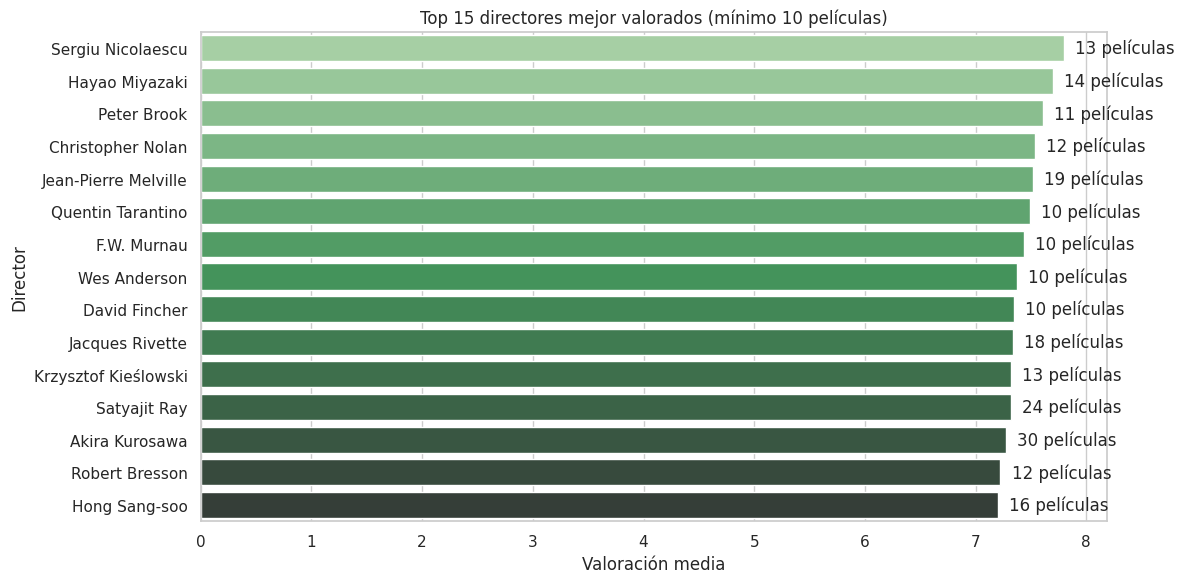

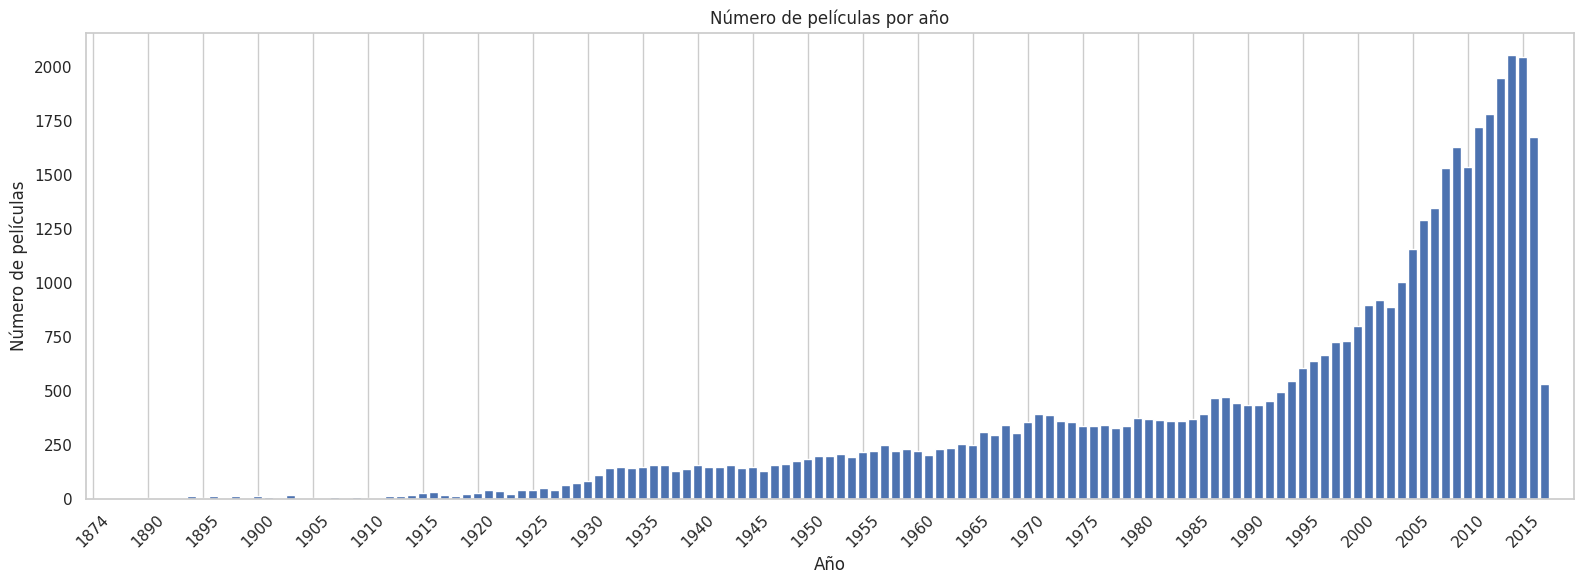

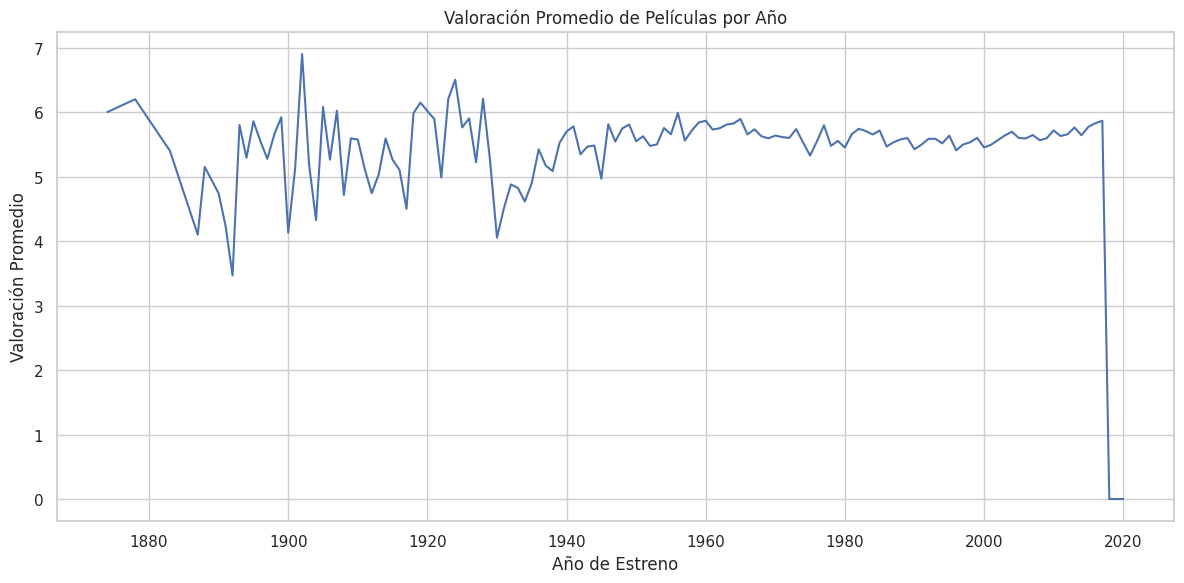

In [ ]:
# Distribución de generos mas frecuentes
# Extraer y contar nombres de géneros
genre_counts = Counter([genre['name'] for genres in movies['genres'] for genre in genres])

# Convertir a DataFrame para graficar
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count']).sort_values(by='count', ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=genre_df.index[:15], y=genre_df['count'][:15])
plt.xticks(rotation=45)
plt.title("Top 15 géneros más frecuentes")
plt.ylabel("Número de películas")
plt.xlabel("Género")
plt.tight_layout()
plt.show()

#-----------------------------------------------------------------------------

# Peliculas con mayor puntucion

# Top 15 por media de votos
top_rated = movies[movies['vote_count'] > 1000].sort_values(by='vote_average', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x='vote_average', y='title', data=top_rated)
plt.title('Top 15 películas mejor valoradas (con >1000 votos)')
plt.xlabel('Valoración media')
plt.ylabel('Película')
plt.show()

#-----------------------------------------------------------------------------

# Popularidad media de las películas por año de estreno

# Asegurar tipo numérico (forzamos errores a NaN si es necesario)
movies['popularity'] = pd.to_numeric(movies['popularity'], errors='coerce')

# Extraer año de la fecha
movies['release_year'] = pd.to_datetime(movies['release_date'], errors='coerce').dt.year

# Media de popularidad por año
popularity_by_year = movies.groupby('release_year')['popularity'].mean().dropna()

# Gráfico
plt.figure(figsize=(12,6))
popularity_by_year.plot()
plt.title('Popularidad media de las películas por año de estreno')
plt.xlabel('Año')
plt.ylabel('Popularidad media')
plt.grid(True)
plt.tight_layout()
plt.show()

#-----------------------------------------------------------------------------

# Nubes de keywords

# Unimos todas las keywords válidas en una cadena
all_keywords = ','.join(
    kw for keyword_list in movies['keywords']
    if isinstance(keyword_list, list)
    for kw in keyword_list
    if isinstance(kw, str)
)

# Crear la nube
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_keywords)

# Mostrar
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras de 'keywords'")
plt.show()

#-----------------------------------------------------------------------------

# Top 15 directores con más películas

# Aseguramos que release_year es numérico
movies['release_year'] = pd.to_datetime(movies['release_date'], errors='coerce').dt.year

# Agrupar por director
director_stats = movies.groupby('director').agg(
    num_movies=('title', 'count'),
    avg_year=('release_year', 'mean')
).dropna()

# Seleccionar los 15 con más películas
top_directors = director_stats.sort_values(by='num_movies', ascending=False).head(15)

# Convertir años promedio a enteros para mejor presentación
top_directors['avg_year'] = top_directors['avg_year'].round().astype(int)

# Gráfico con anotación de año medio
plt.figure(figsize=(12,6))
sns.barplot(x='num_movies', y=top_directors.index, data=top_directors, palette='Blues_d')

# Añadimos los años como texto al lado de las barras
for i, (movies_count, year) in enumerate(zip(top_directors['num_movies'], top_directors['avg_year'])):
    plt.text(movies_count + 0.5, i, f"Año medio: {year}", va='center')

plt.title("Top 15 directores con más películas (y año medio de estreno)")
plt.xlabel("Número de películas")
plt.ylabel("Director")
plt.tight_layout()
plt.show()

#-----------------------------------------------------------------------------

# Top 15 directores mejor valorados con al menos 5 películas

# Agrupamos por director y calculamos media de valoración y número de películas
director_rating = movies.groupby('director').agg(
    avg_rating=('vote_average', 'mean'),
    num_movies=('title', 'count')
).dropna()

# Filtramos los que tienen al menos 5 películas
director_rating = director_rating[director_rating['num_movies'] >= 5]

# Ordenamos por valoración media
top_rated_directors = director_rating.sort_values(by='avg_rating', ascending=False).head(15)

# Gráfico
plt.figure(figsize=(12,6))
sns.barplot(x='avg_rating', y=top_rated_directors.index, data=top_rated_directors, palette='Greens_d')

# Añadir número de películas como texto al lado de cada barra
for i, (rating, count) in enumerate(zip(top_rated_directors['avg_rating'], top_rated_directors['num_movies'])):
    plt.text(rating + 0.1, i, f"{count} películas", va='center')

plt.title("Top 15 directores mejor valorados (mínimo 5 películas)")
plt.xlabel("Valoración media")
plt.ylabel("Director")
plt.tight_layout()
plt.show()

#-----------------------------------------------------------------------------

# Top 15 directores mejor valorados con al menos 10 películas

# Agrupamos por director y calculamos media de valoración y número de películas
director_rating = movies.groupby('director').agg(
    avg_rating=('vote_average', 'mean'),
    num_movies=('title', 'count')
).dropna()

# Filtramos los que tienen al menos 5 películas
director_rating = director_rating[director_rating['num_movies'] >= 10]

# Ordenamos por valoración media
top_rated_directors = director_rating.sort_values(by='avg_rating', ascending=False).head(15)

# Gráfico
plt.figure(figsize=(12,6))
sns.barplot(x='avg_rating', y=top_rated_directors.index, data=top_rated_directors, palette='Greens_d')

# Añadir número de películas como texto al lado de cada barra
for i, (rating, count) in enumerate(zip(top_rated_directors['avg_rating'], top_rated_directors['num_movies'])):
    plt.text(rating + 0.1, i, f"{count} películas", va='center')

plt.title("Top 15 directores mejor valorados (mínimo 10 películas)")
plt.xlabel("Valoración media")
plt.ylabel("Director")
plt.tight_layout()
plt.show()

#-----------------------------------------------------------------------------

# Distribución del número de películas por año

# Reutilizamos la serie de películas por año
films_per_year = movies['release_year'].value_counts().sort_index()

plt.figure(figsize=(16,6))
films_per_year.plot(kind='bar', width=0.8)

# Mostrar solo una de cada n etiquetas en el eje X
n = 5  # cambia esto si quieres menos/más densidad
plt.xticks(ticks=range(0, len(films_per_year), n), labels=films_per_year.index[::n], rotation=45)

plt.title("Número de películas por año")
plt.xlabel("Año")
plt.ylabel("Número de películas")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#-----------------------------------------------------------------------------

# Valoración de las películas por año

movies_year = movies['release_date'].dt.year
ratings_by_year = movies.groupby('release_year')['vote_average'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=ratings_by_year, x='release_year', y='vote_average')

plt.title('Valoración Promedio de Películas por Año')
plt.xlabel('Año de Estreno')
plt.ylabel('Valoración Promedio')
plt.grid(True)
plt.tight_layout()
plt.show()


# Análisis predictivo

## Imports

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sentence_transformers import SentenceTransformer

## Funciones

In [ ]:
def garantizar_valores_correctos():
  # Aseguramos tipos numéricos válidos
  movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
  movies['revenue'] = pd.to_numeric(movies['revenue'], errors='coerce')
  movies['vote_average'] = pd.to_numeric(movies['vote_average'], errors='coerce')
  movies['vote_count'] = pd.to_numeric(movies['vote_count'], errors='coerce')
  movies['runtime'] = pd.to_numeric(movies['runtime'], errors='coerce')
  movies['popularity'] = pd.to_numeric(movies['popularity'], errors='coerce')

  # Variables categóricas: genres, production_companies, keywords → transformaremos a texto para vectorizar
  # Extraer texto de los géneros
  movies['genre_text'] = movies['genres'].apply(
      lambda x: ' '.join([g['name'] for g in x if isinstance(g, dict)]) if isinstance(x, list) else 'No Genre'
  )

  # Extraer texto de las productoras
  movies['company_text'] = movies['production_companies'].apply(
      lambda x: ' '.join([c['name'] for c in x if isinstance(c, dict)]) if isinstance(x, list) else 'No Company'
  )

  # Extraer texto de las keywords
  movies['keyword_text'] = movies['keywords'].apply(
      lambda x: ' '.join(x) if isinstance(x, list) else 'No Keywords'
  )

  # Extraer nombre de colección
  movies['collection_name'] = movies['belongs_to_collection'].apply(
      lambda x: x['name'] if isinstance(x, dict) and x['name'] else 'No Collection'
  )

## Preparación de los datos



In [ ]:
garantizar_valores_correctos()
movies['release_year'] = pd.to_datetime(movies['release_date'], errors='coerce').dt.year
# Media de popularidad por año
popularity_by_year = movies.groupby('release_year')['popularity'].mean().dropna()
# Creamos un nuevo dataframe solo con las columnas útiles
df_model = movies[[
    'budget', 'runtime', 'release_year',
    'genre_text', 'company_text', 'keyword_text', 'collection_name', 'revenue'
]].dropna()  # quitamos filas con NaNs

# Eliminamos ingresos 0, que no aportan
df_model = df_model[df_model['revenue'] > 0]

## Predicción con Ridge

In [ ]:

# Variables
X = df_model.drop(columns='revenue')
y = df_model['revenue']

# Dividir train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Columnas por tipo
numeric_features = ['budget', 'runtime', 'release_year']
text_features = ['genre_text', 'company_text', 'keyword_text', 'collection_name']

# Preprocesador
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('genre', TfidfVectorizer(max_features=100), 'genre_text'),
    ('company', TfidfVectorizer(max_features=100), 'company_text'),
    ('keyword', TfidfVectorizer(max_features=100), 'keyword_text'),
    ('collection', TfidfVectorizer(max_features=50), 'collection_name')
])

# Pipeline con regresión Ridge
model = Pipeline([
    ('pre', preprocessor),
    ('reg', Ridge(alpha=1.0))
])

# Entrenar
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Evaluar
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:,.0f}")
print(f"R²: {r2:.4f}")

RMSE: 88,935,279
R²: 0.6203


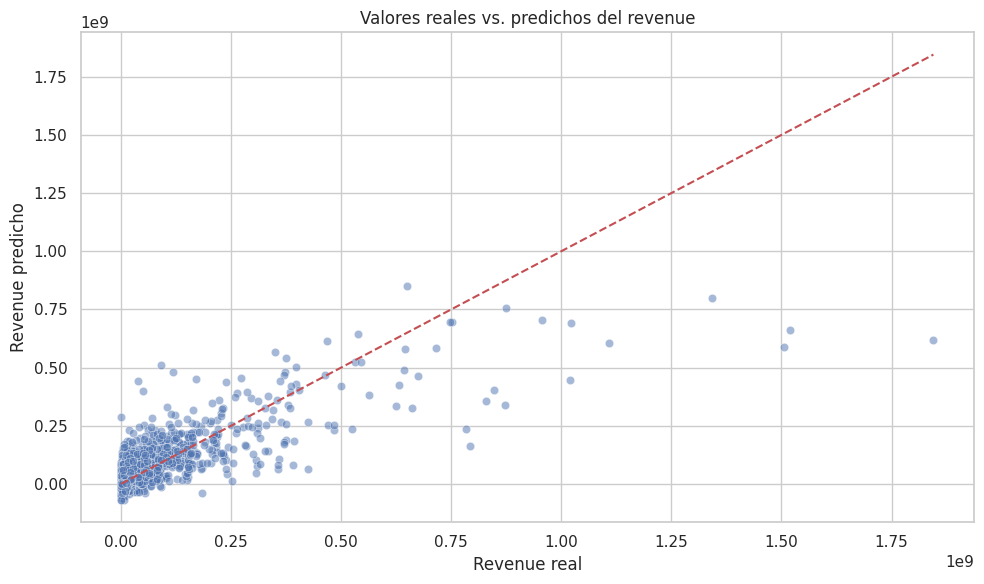

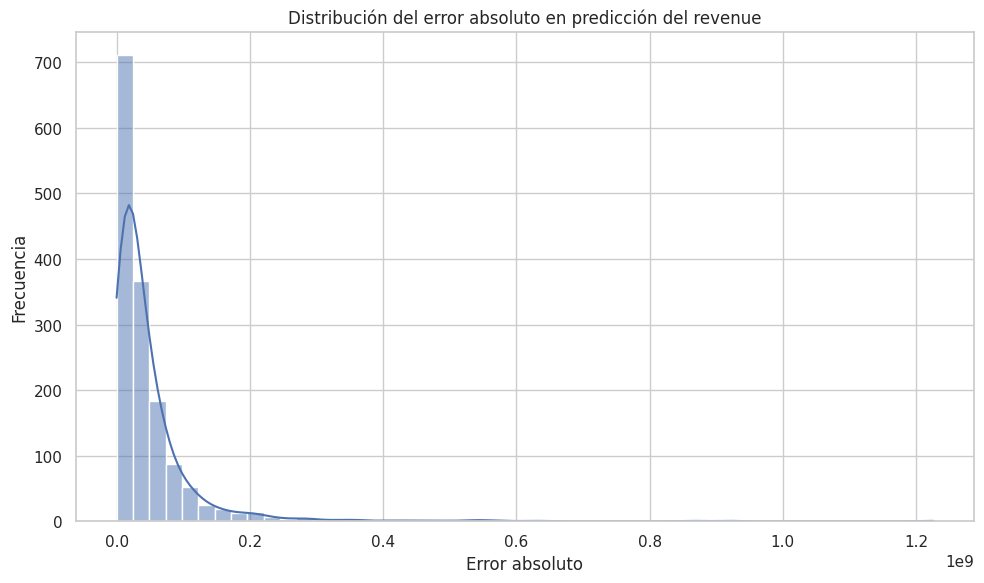

In [ ]:
# Scatter plot real vs predicho
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # línea de referencia
plt.title('Valores reales vs. predichos del revenue')
plt.xlabel('Revenue real')
plt.ylabel('Revenue predicho')
plt.tight_layout()
plt.show()

# Cálculo del error absoluto
abs_error = np.abs(y_test - y_pred)
plt.figure(figsize=(10, 6))
sns.histplot(abs_error, bins=50, kde=True)
plt.title('Distribución del error absoluto en predicción del revenue')
plt.xlabel('Error absoluto')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

## Predicción con Random Forest

In [ ]:
# Usamos el dataframe original con revenue real
X = df_model.drop(columns=['revenue', 'log_revenue'], errors='ignore')
y = df_model['revenue']

# Dividir nuevamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Nuevo modelo Random Forest
rf_model = Pipeline([
    ('pre', preprocessor),
    ('reg', RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1))
])

# Entrenar
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Métricas
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"RMSE: {rmse_rf:,.0f}")
print(f"R²: {r2_rf:.4f}")

RMSE: 82,702,386
R²: 0.6717


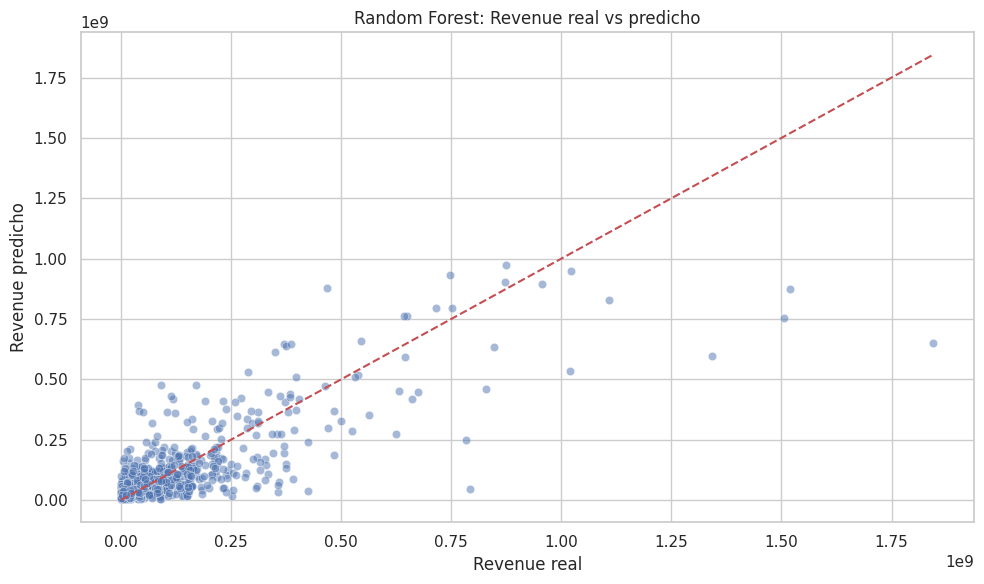

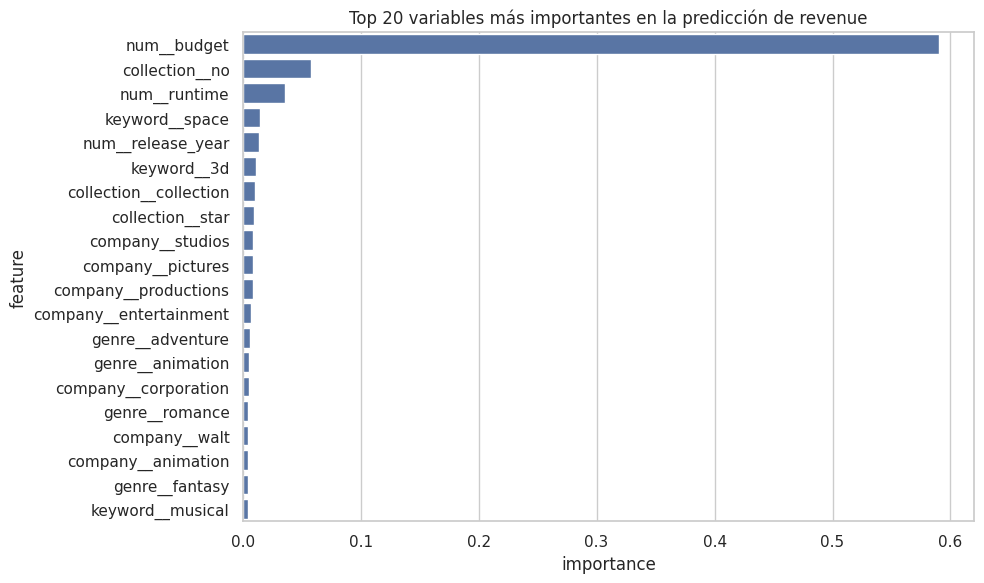

In [ ]:
# Valores reales vs predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Random Forest: Revenue real vs predicho')
plt.xlabel('Revenue real')
plt.ylabel('Revenue predicho')
plt.tight_layout()
plt.show()

# Importancia de las columnas en la predicción

# Extraer el modelo entrenado internamente
rf_final_model = rf_model.named_steps['reg']

# Obtener nombres de las columnas después del preprocesamiento
feature_names = rf_model.named_steps['pre'].get_feature_names_out()

# Obtener importancias
importances = rf_final_model.feature_importances_

# Crear DataFrame
feat_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_df = feat_df.sort_values(by='importance', ascending=False).head(20)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feat_df)
plt.title("Top 20 variables más importantes en la predicción de revenue")
plt.tight_layout()
plt.show()


## Predicción con XGBoost

In [ ]:
# Crear nuevo pipeline
xgb_model = Pipeline([
    ('pre', preprocessor),
    ('reg', XGBRegressor(
        n_estimators=200,
        max_depth=8,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

# Entrenar
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Métricas
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"RMSE (XGBoost): {rmse_xgb:,.0f}")
print(f"R² (XGBoost): {r2_xgb:.4f}")

RMSE (XGBoost): 85,339,010
R² (XGBoost): 0.6504


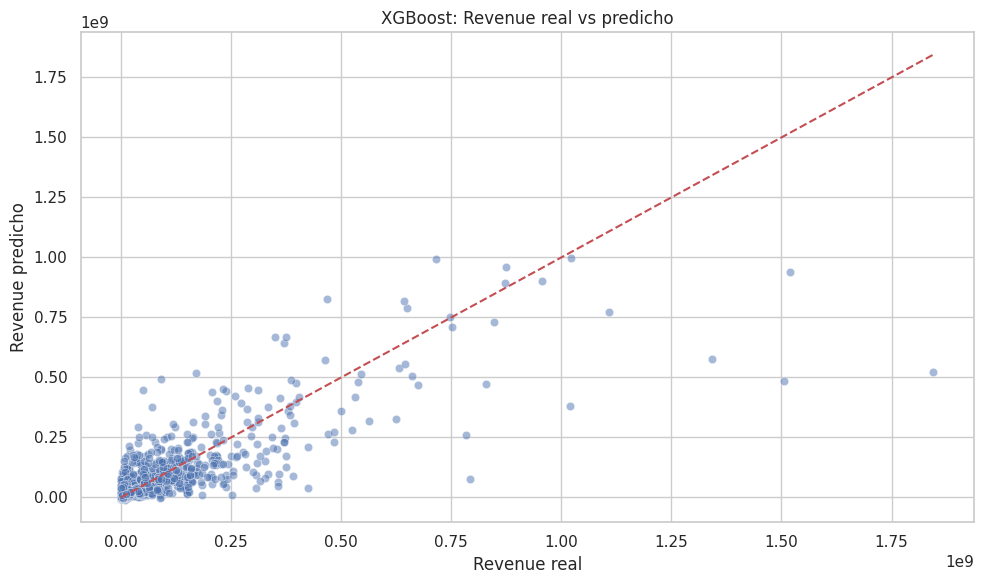

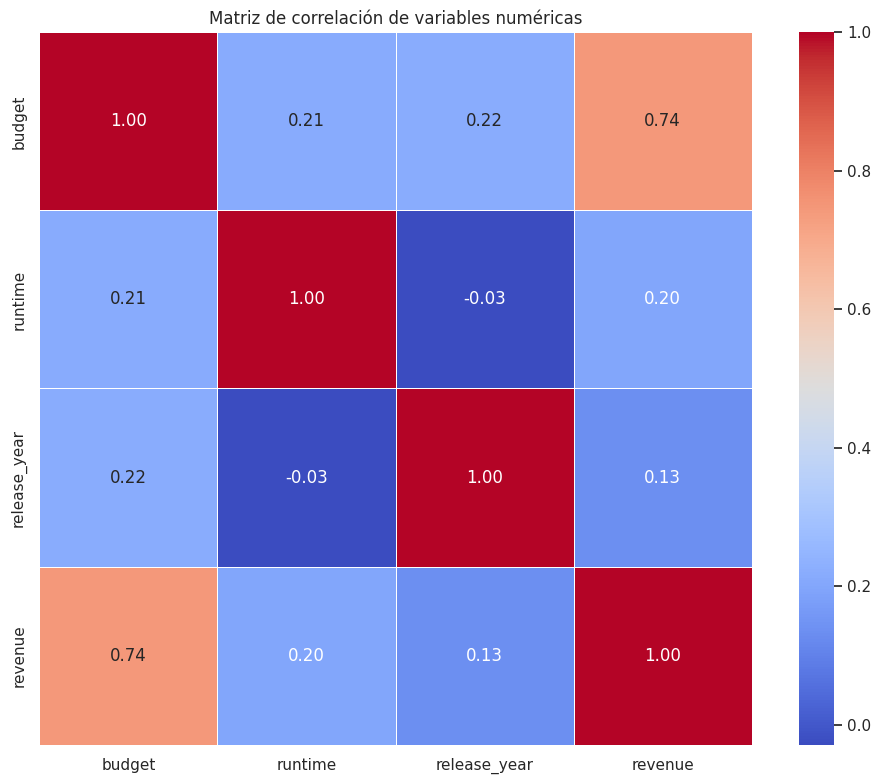

In [ ]:
# Valores reales vs predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('XGBoost: Revenue real vs predicho')
plt.xlabel('Revenue real')
plt.ylabel('Revenue predicho')
plt.tight_layout()
plt.show()

# Matriz de Correlación

# Seleccionar solo las columnas numéricas del dataset
numeric_cols = df_model.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr_matrix = numeric_cols.corr()

# Mostrar como heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Matriz de correlación de variables numéricas")
plt.tight_layout()
plt.show()

## Test de los modelos de predicción

In [ ]:
new_movie = {
    'budget': 100000000,
    'runtime': 120,
    'release_year': 2024,
    'genre_text': 'Action Adventure Sci-Fi',
    'company_text': 'Marvel Studios',
    'keyword_text': 'superhero marvel avengers fight alien',
    'collection_name': 'Avengers Collection'
}

new_movie_soul = {
    'budget': 150000000,
    'runtime': 100,
    'release_year': 2020,
    'genre_text': 'Animation Comedy Drama',
    'company_text': 'Walt Disney Pictures Pixar Animation Studios',
    'keyword_text': 'afterlife jazz musician soul pianist purpose',
    'collection_name': 'No Collection'
}

new_movie_parasite = {
    'budget': 11400000,
    'runtime': 132,
    'release_year': 2019,
    'genre_text': 'Drama Thriller',
    'company_text': 'CJ Entertainment Barunson E&A',
    'keyword_text': 'class divide poverty family infiltration manipulation',
    'collection_name': 'No Collection'
}

new_movie_joker = {
    'budget': 55000000,
    'runtime': 122,
    'release_year': 2019,
    'genre_text': 'Crime Drama Thriller',
    'company_text': 'Warner Bros DC Films Village Roadshow Pictures',
    'keyword_text': 'joker mental illness clown society chaos',
    'collection_name': 'No Collection'
}


new_movie_oppenheimer = {
    'budget': 100000000,
    'runtime': 180,
    'release_year': 2023,
    'genre_text': 'Drama History',
    'company_text': 'Syncopy Universal Pictures',
    'keyword_text': 'manhattan project atomic bomb scientist war biography',
    'collection_name': 'No Collection'
}


new_movie_df = pd.DataFrame([new_movie])

new_movie_soul_df = pd.DataFrame([new_movie_soul])
new_movie_parasite_df = pd.DataFrame([new_movie_parasite])
new_movie_joker_df = pd.DataFrame([new_movie_joker])
new_movie_oppenheimer_df = pd.DataFrame([new_movie_oppenheimer])

# Predecir
predicted_revenue = xgb_model.predict(new_movie_df)

predicted_revenue_soul = xgb_model.predict(new_movie_soul_df)
predicted_revenue_parasite = xgb_model.predict(new_movie_df)
predicted_revenue_joker = xgb_model.predict(new_movie_joker_df)
predicted_revenue_oppenheimer = xgb_model.predict(new_movie_oppenheimer_df)

# Mostrar resultado
print(f"Predicted revenue: ${predicted_revenue_soul[0]:,.0f}")

Predicted revenue: $568,395,392


# Predicción de ingresos y valoración a partir de texto

## Preparar los datos

In [ ]:
df_text = movies[['overview', 'genre_text', 'director', 'revenue', 'vote_average', 'keyword_text']].dropna()
df_text = df_text[df_text['overview'].str.strip() != '']
df_text = df_text[df_text['revenue'] > 0]

## Predicción con XGBOOST

### Revenue

In [ ]:
# Variables de entrada (comunes)
X = df_text[['overview', 'genre_text', 'director','keyword_text']]

# Variables objetivo
y_revenue = df_text['revenue']
y_vote = df_text['vote_average']
# ColumnTransformer para TF-IDF y OneHot
preprocessor = ColumnTransformer([
    ('desc', TfidfVectorizer(max_features=8000, stop_words='english', ngram_range=(1,2)), 'overview'),
    ('genre', TfidfVectorizer(max_features=300), 'genre_text'),
    ('dir', OneHotEncoder(handle_unknown='ignore'), ['director']),
    ('keywords', TfidfVectorizer(max_features=300), 'keyword_text'),
])

# Separar datos
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_revenue, test_size=0.2, random_state=42)

# Pipeline revenue
revenue_model = Pipeline([
    ('pre', preprocessor),
    ('reg', XGBRegressor(
        n_estimators=300,
        max_depth=8,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

# Entrenar
revenue_model.fit(X_train_r, y_train_r)

# Predecir
y_pred_r = revenue_model.predict(X_test_r)

# Evaluación
rmse_r = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
r2_r = r2_score(y_test_r, y_pred_r)

print(f"REVENUE → RMSE: {rmse_r:,.0f}")
print(f"REVENUE → R²: {r2_r:.4f}")

REVENUE → RMSE: 112,348,171
REVENUE → R²: 0.3941


### Vote

In [ ]:
# Separar datos
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X, y_vote, test_size=0.2, random_state=42)

# Pipeline vote_average
vote_model = Pipeline([
    ('pre', preprocessor),
    ('reg', XGBRegressor(
        n_estimators=300,
        max_depth=8,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

# Entrenar
vote_model.fit(X_train_v, y_train_v)

# Predecir
y_pred_v = vote_model.predict(X_test_v)

# Evaluación
rmse_v = np.sqrt(mean_squared_error(y_test_v, y_pred_v))
r2_v = r2_score(y_test_v, y_pred_v)

print(f"VOTE AVERAGE → RMSE: {rmse_v:.4f}")
print(f"VOTE AVERAGE → R²: {r2_v:.4f}")

VOTE AVERAGE → RMSE: 1.0201
VOTE AVERAGE → R²: 0.1208


## Predicción revenue con Bert

In [ ]:
# Cargar modelo BERT optimizado
model_st = SentenceTransformer('all-MiniLM-L6-v2')

# Codificar todas las descripciones en vectores
text_embeddings = model_st.encode(df_text['overview'].tolist(), show_progress_bar=True)
# TF-IDF para género
tfidf_genre = TfidfVectorizer(max_features=300)
genre_vecs = tfidf_genre.fit_transform(df_text['genre_text']).toarray()

# One-hot encoding para director
onehot_dir = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
dir_vecs = onehot_dir.fit_transform(df_text[['director']])

# Concatenar texto + género + director
X_final = np.hstack([text_embeddings, genre_vecs, dir_vecs])

# Targets
y_revenue = df_text['revenue'].values
y_vote = df_text['vote_average'].values

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/236 [00:00<?, ?it/s]

## Predicción Revenue

In [ ]:
# Separar datos
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_final, y_revenue, test_size=0.2, random_state=42)

# Entrenar modelo XGBoost
model_revenue = XGBRegressor(n_estimators=300, max_depth=8, learning_rate=0.1, random_state=42, n_jobs=-1)
model_revenue.fit(X_train_r, y_train_r)

# Predecir y evaluar
y_pred_r = model_revenue.predict(X_test_r)
rmse_r = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
r2_r = r2_score(y_test_r, y_pred_r)

print(f"BERT → REVENUE → RMSE: {rmse_r:,.0f}")
print(f"BERT → REVENUE → R²: {r2_r:.4f}")

BERT → REVENUE → RMSE: 131,239,056
BERT → REVENUE → R²: 0.1732


## Predicción vote

In [ ]:
# Separar datos
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_final, y_vote, test_size=0.2, random_state=42)

# Entrenar modelo XGBoost
model_vote = XGBRegressor(n_estimators=300, max_depth=8, learning_rate=0.1, random_state=42, n_jobs=-1)
model_vote.fit(X_train_v, y_train_v)

# Predecir y evaluar
y_pred_v = model_vote.predict(X_test_v)
rmse_v = np.sqrt(mean_squared_error(y_test_v, y_pred_v))
r2_v = r2_score(y_test_v, y_pred_v)

print(f"BERT → VOTE AVERAGE → RMSE: {rmse_v:.4f}")
print(f"BERT → VOTE AVERAGE → R²: {r2_v:.4f}")

BERT → VOTE AVERAGE → RMSE: 1.0416
BERT → VOTE AVERAGE → R²: 0.0834


## Ejemplo de predicción

In [ ]:
def predecir_pelicula_bert(descripcion, genero, director):
    import numpy as np

    # 1. Codificar el texto con BERT
    desc_vector = model_st.encode([descripcion])

    # 2. Codificar el género con TF-IDF
    genero_vector = tfidf_genre.transform([genero]).toarray()

    # 3. Codificar el director con OneHotEncoder
    try:
        director_vector = onehot_dir.transform([[director]])
    except:
        # Si el director no existe en el entrenamiento, usar vector de ceros
        director_vector = np.zeros((1, onehot_dir.categories_[0].shape[0]))

    # 4. Concatenar todo en un único vector
    input_vector = np.hstack([desc_vector, genero_vector, director_vector])

    # 5. Predecir revenue y vote_average
    pred_revenue = model_revenue.predict(input_vector)[0]
    pred_vote = model_vote.predict(input_vector)[0]

    # 6. Mostrar resultados
    print("Predicción para la película:")
    print(f"Revenue estimado: ${pred_revenue:,.0f}")
    print(f"Valoración estimada: {pred_vote:.2f} / 10")


In [ ]:
predecir_pelicula_bert(
    descripcion="In wartime, the brilliant American physicist Julius Robert Oppenheimer, at the head of the 'Manhattan Project', leads nuclear tests to build the atomic bomb for his country. Shocked by its destructive power, Oppenheimer questions the moral consequences of his creation.",
    genero="Drama. Thriller. Biography. 1940s. Historical. Nuclear Holocaust. Courtroom Drama. Lawyers. II World War ",
    director="Christopher Nolan"
)

predecir_pelicula_bert(
    descripcion="When visionary architect László Toth and his wife Erzsébet flee post-war Europe in 1947 to rebuild their legacy and witness the birth of modern America, their lives are changed forever by a mysterious and wealthy client.",
    genero="Drama. Architecture. Immigration. 1950s. 1940s. 1960s. Independent Film ",
    director="Brady Corbet"
)

Predicción para la película:
Revenue estimado: $681,420,928
Valoración estimada: 7.41 / 10
Predicción para la película:
Revenue estimado: $18,546,088
Valoración estimada: 6.79 / 10


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [ ]:
models = {
    'Linear Regression': model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
}

movies = {
    'Soul': new_movie_soul,
    'Parásitos': new_movie_parasite,
    'Joker': new_movie_joker,
    'Oppenheimer': new_movie_oppenheimer
}

for movie_name, movie_data in movies.items():
    df = pd.DataFrame([movie_data])
    print(f"\n--- Predicciones para '{movie_name}' ---")
    for model_name, model in models.items():
        pred = model.predict(df)
        print(f"{model_name}: ${pred[0]:,.0f}")



--- Predicciones para 'Soul' ---
Linear Regression: $457,422,162
Random Forest: $601,444,828
XGBoost: $568,395,392

--- Predicciones para 'Parásitos' ---
Linear Regression: $20,370,788
Random Forest: $28,078,551
XGBoost: $19,250,160

--- Predicciones para 'Joker' ---
Linear Regression: $99,223,389
Random Forest: $108,428,485
XGBoost: $146,585,488

--- Predicciones para 'Oppenheimer' ---
Linear Regression: $272,840,989
Random Forest: $241,682,976
XGBoost: $268,675,296


In [ ]:
# Predicciones con BERT
peliculas_bert = {
    "Soul": {
        "descripcion": "A jazz musician, stuck in a mediocre job, finally gets his big break but finds himself transported out of his body and must find his way back with the help of an infant soul.",
        "genero": "Animation. Comedy. Drama. Jazz. Afterlife. Soul. Pixar",
        "director": "Pete Docter"
    },
    "Parásitos": {
        "descripcion": "Greed and class discrimination threaten the newly formed symbiotic relationship between the wealthy Park family and the destitute Kim clan.",
        "genero": "Drama. Thriller. Satire. Social Class. Family. Korean Cinema",
        "director": "Bong Joon-ho"
    },
    "Joker": {
        "descripcion": "In Gotham City, mentally troubled comedian Arthur Fleck embarks on a downward spiral of social revolution and bloody crime to become the infamous criminal known as Joker.",
        "genero": "Crime. Drama. Thriller. Mental Illness. Society. DC Comics",
        "director": "Todd Phillips"
    },
    "Oppenheimer": {
        "descripcion": "In wartime, the brilliant American physicist J. Robert Oppenheimer leads the Manhattan Project to build the atomic bomb. Shocked by its destructive power, he questions the moral consequences.",
        "genero": "Drama. History. Biography. World War II. Nuclear. Scientists",
        "director": "Christopher Nolan"
    }
}

print("\n=== Predicciones con modelo BERT ===")
for nombre, datos in peliculas_bert.items():
    print(f"\n--- {nombre} ---")
    predecir_pelicula_bert(
        descripcion=datos["descripcion"],
        genero=datos["genero"],
        director=datos["director"]
    )



=== Predicciones con modelo BERT ===

--- Soul ---
Predicción para la película:
Revenue estimado: $128,880,728
Valoración estimada: 6.75 / 10

--- Parásitos ---
Predicción para la película:
Revenue estimado: $105,552,488
Valoración estimada: 6.48 / 10

--- Joker ---
Predicción para la película:
Revenue estimado: $113,180,336
Valoración estimada: 6.49 / 10

--- Oppenheimer ---
Predicción para la película:
Revenue estimado: $324,343,392
Valoración estimada: 7.01 / 10


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
